In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mercancias_nav = pd.read_excel('data/Mercancias-RESUMEN.xlsx','RESUMEN')

mercancias_nav

,Año,Autoridad Portuaria,Operacion,Transito,Graneles líquidos,Graneles sólidos,TRÁFICO TOTAL,Unnamed: 7
0,1962,A Coruña,Desembarque,Incluido tránsito,204092.0,147137.0,540444,NaN
1,1962,A Coruña,Embarque,Incluido tránsito,6088.0,357934.0,658921,NaN
2,1963,A Coruña,Desembarque,Incluido tránsito,207576.0,165111.0,576053,NaN
3,1963,A Coruña,Embarque,Incluido tránsito,7328.0,351476.0,714987,NaN
4,1964,A Coruña,Desembarque,Incluido tránsito,1618225.0,201623.0,2047384,NaN
...,...,...,...,...,...,...,...,...
5708,2024,Sevilla,Total,Incluido tránsito,NaN,NaN,4272908,NaN
5709,2024,Tarragona,Total,Incluido tránsito,NaN,NaN,31858398,NaN
5710,2024,Valencia,Total,Incluido tránsito,NaN,NaN,81138594,NaN
5711,2024,Vigo,Total,Incluido tránsito,NaN,NaN,5681072,NaN


In [3]:
mercancias_nav = mercancias_nav[mercancias_nav['Autoridad Portuaria']!='C.A.G.P.']
mercancias_nav = mercancias_nav[mercancias_nav['Transito'] != 'Solo tránsito']

mercancias_nav

,Año,Autoridad Portuaria,Operacion,Transito,Graneles líquidos,Graneles sólidos,TRÁFICO TOTAL,Unnamed: 7
0,1962,A Coruña,Desembarque,Incluido tránsito,204092.0,147137.0,540444,NaN
1,1962,A Coruña,Embarque,Incluido tránsito,6088.0,357934.0,658921,NaN
2,1963,A Coruña,Desembarque,Incluido tránsito,207576.0,165111.0,576053,NaN
3,1963,A Coruña,Embarque,Incluido tránsito,7328.0,351476.0,714987,NaN
4,1964,A Coruña,Desembarque,Incluido tránsito,1618225.0,201623.0,2047384,NaN
...,...,...,...,...,...,...,...,...
5708,2024,Sevilla,Total,Incluido tránsito,NaN,NaN,4272908,NaN
5709,2024,Tarragona,Total,Incluido tránsito,NaN,NaN,31858398,NaN
5710,2024,Valencia,Total,Incluido tránsito,NaN,NaN,81138594,NaN
5711,2024,Vigo,Total,Incluido tránsito,NaN,NaN,5681072,NaN


In [4]:
mercancias_nav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5124 entries, 0 to 5712
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  5124 non-null   int64  
 1   Autoridad Portuaria  5124 non-null   object 
 2   Operacion            5124 non-null   object 
 3   Transito             5124 non-null   object 
 4   Graneles líquidos    5096 non-null   float64
 5   Graneles sólidos     5096 non-null   float64
 6   TRÁFICO TOTAL        5124 non-null   int64  
 7   Unnamed: 7           1 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 360.3+ KB


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los tipos sean correctos
mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce')
mercancias_nav['TRÁFICO TOTAL'] = pd.to_numeric(mercancias_nav['TRÁFICO TOTAL'], errors='coerce')
mercancias_nav['Autoridad Portuaria'] = mercancias_nav['Autoridad Portuaria'].str.strip()

# Agrupar por Año y Autoridad Portuaria
agrupado = mercancias_nav.groupby(['Año', 'Autoridad Portuaria'])['TRÁFICO TOTAL'].sum().reset_index()

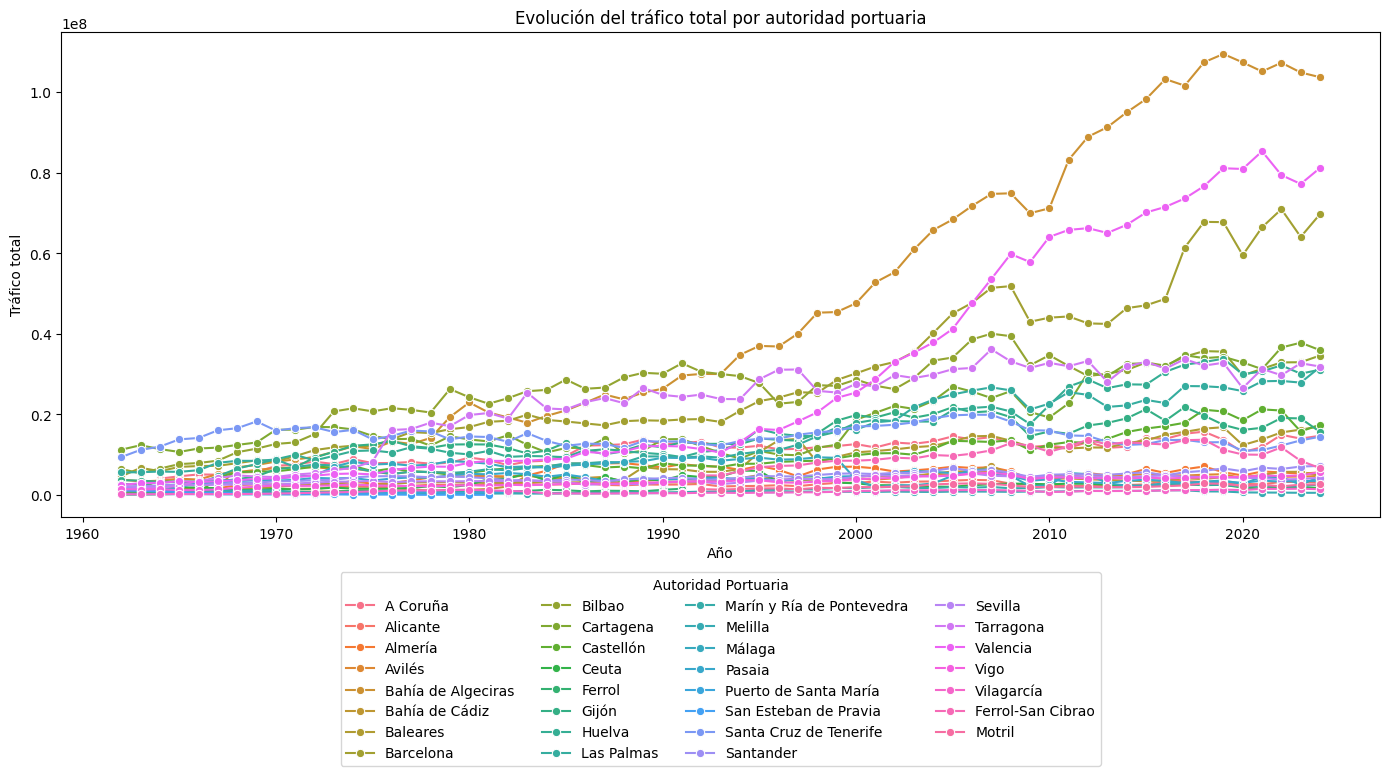

In [16]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=agrupado, x='Año', y='TRÁFICO TOTAL', hue='Autoridad Portuaria', marker='o')

plt.title('Evolución del tráfico total por autoridad portuaria')
plt.xlabel('Año')
plt.ylabel('Tráfico total')
plt.legend(title='Autoridad Portuaria', bbox_to_anchor=(0.5, -0.10),
    loc='upper center',
    ncol=4)
plt.tight_layout()
plt.show()

In [17]:
top_puertos = agrupado.groupby('Autoridad Portuaria')['TRÁFICO TOTAL'].sum().nlargest(5).index
agrupado_top = agrupado[agrupado['Autoridad Portuaria'].isin(top_puertos)]

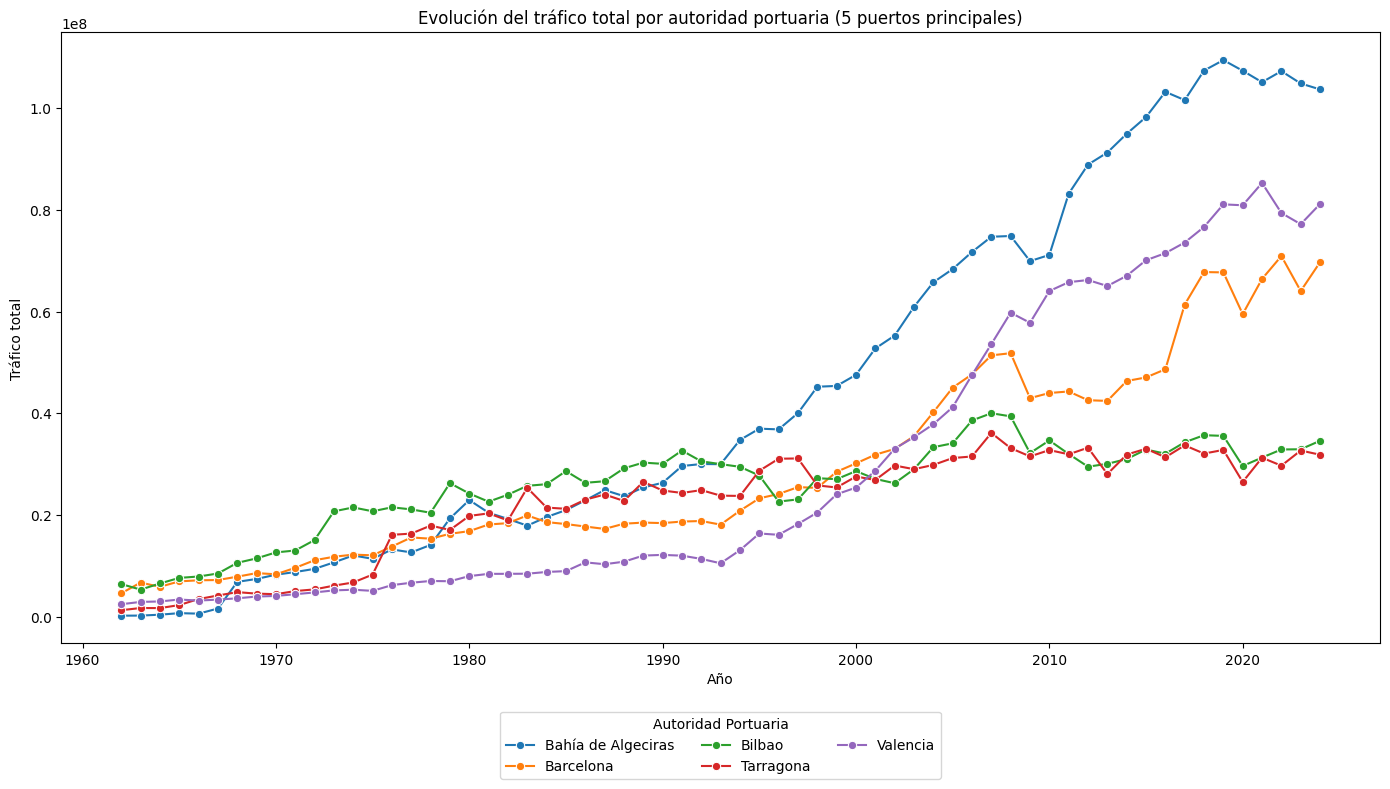

In [21]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=agrupado_top, x='Año', y='TRÁFICO TOTAL', hue='Autoridad Portuaria', marker='o')

plt.title('Evolución del tráfico total por autoridad portuaria (5 puertos principales)')
plt.xlabel('Año')
plt.ylabel('Tráfico total')
plt.legend(title='Autoridad Portuaria', bbox_to_anchor=(0.5, -0.10),
    loc='upper center',
    ncol=3)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular total anual
totales_anuales = agrupado.groupby('Año')['TRÁFICO TOTAL'].sum().reset_index(name='TOTAL AÑO')
agrupado = agrupado.merge(totales_anuales, on='Año')

# Calcular el porcentaje
agrupado['Porcentaje'] = (agrupado['TRÁFICO TOTAL'] / agrupado['TOTAL AÑO']) * 100

# Detectar los 5 principales puertos por volumen acumulado total
top_5_puertos = agrupado.groupby('Autoridad Portuaria')['TRÁFICO TOTAL'].sum().nlargest(5).index

# Clasificar puertos fuera del top 5 como "Otros"
agrupado['Puerto Agrupado'] = agrupado['Autoridad Portuaria'].apply(
    lambda x: x if x in top_5_puertos else 'Otros'
)

# Volver a agrupar por Año y Puerto Agrupado para sumar porcentajes
agrupado_final = agrupado.groupby(['Año', 'Puerto Agrupado'])['Porcentaje'].sum().reset_index()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_3356\3482146581.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(data=agrupado_final, title='Puerto', bbox_to_anchor=(1.05, 1), loc='upper left')


TypeError: Legend.__init__() got an unexpected keyword argument 'data'

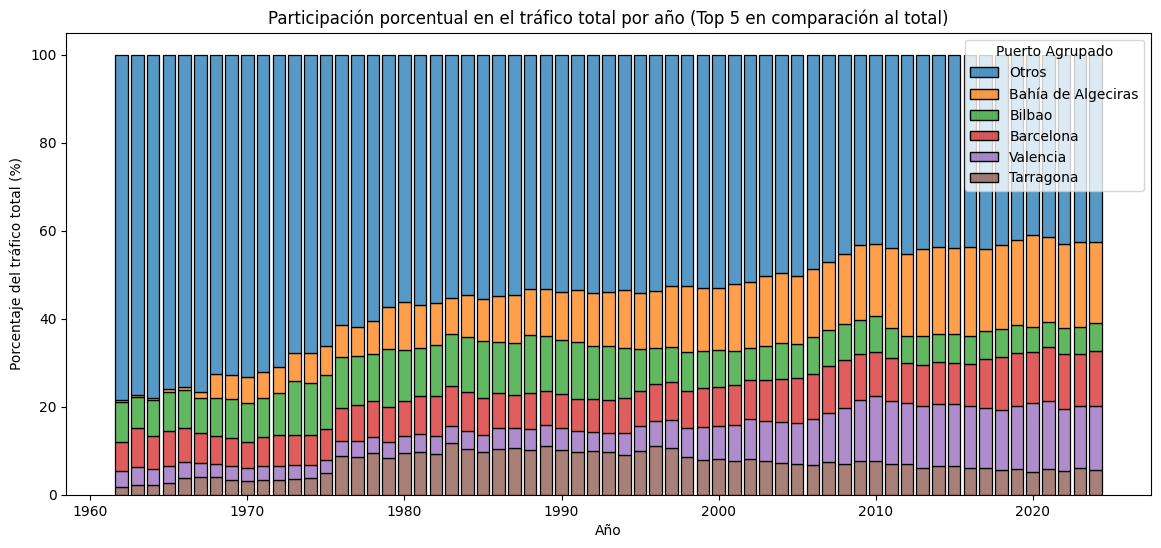

In [ ]:
plt.figure(figsize=(14, 6))

# Ordenar los puertos por su porcentaje promedio (de mayor a menor)
order = agrupado_final.groupby('Puerto Agrupado')['Porcentaje'].mean().sort_values(ascending=False).index

sns.histplot(data=agrupado_final, x='Año', weights='Porcentaje', hue='Puerto Agrupado', 
             hue_order=order, multiple='stack', shrink=0.8, discrete=True)

plt.title('Participación porcentual en el tráfico total por año (Top 5 en comparación al total)')
plt.ylabel('Porcentaje del tráfico total (%)')
plt.xlabel('Año')
plt.legend(title='Puerto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()